In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Para que pandas muestre todas las columnas:
pd.set_option("display.max_columns", None)
sns.set()

# 1) Selección del dataset de trabajo:

Se seleccionó la ciudad de **Vancouve**, **Canada**

In [2]:
listings = pd.read_csv(
    "http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/data/listings.csv.gz"
)

calendar = pd.read_csv(
    "http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/data/calendar.csv.gz"
)

reviews = pd.read_csv(
    "http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/data/reviews.csv.gz"
)

# 2) Entendimiento inicial de datos

## Exploración univariada de variables categóricas

In [69]:
listings.describe(exclude="number").T.style

,count,unique,top,freq
listing_url,6355,6355,https://www.airbnb.com/rooms/13188,1
last_scraped,6355,1,2023-06-10,6355
source,6355,2,city scrape,5145
name,6355,2745,Rental unit in Vancouver · 1 bedroom · 1 bed · 1 bath,175
description,6334,6128,"The suite way to stay in downtown Vancouver. Enjoy comforts of home with fully-equipped kitchens, functional living areas, personal outdoor balconies or patios, and convenient in-suite laundry at Level.The spaceAn oasis within the big city is commonly how Vancouver’s Beach District is described. There is no shortage of bistros, sidewalk cafés, vibrant restaurants and waterfront parks in this historic neighbourhood. Level is redefining your travel experience by offering features like fully-equipped gourmet kitchens, modern designed furniture, and spacious walk-in closets. You may be in Vancouver, but you’ll feel right at home in these luxury suites. In addition to our amazing in-suite features you will have access to our outdoor pool, rooftop terrace with BBQs and ample seating, state-of-the-art fitness center, steam room and sauna. Stay Level, your personal sanctuary in Vancouver. In addition to the features mentioned above, Level suites offer:<br",12
neighborhood_overview,4221,3734,"The West End is a neighbourhood in Downtown Vancouver, BC, close to Stanley Park and the areas of Yaletown, Coal Harbour and the financial and central business districts. It is considered the most livable and vibrant community in Vancouver as is filled with beautiful tree-lined streets, yet provides an abundance of options for: shopping, entertainment, health care, schools and much more.The West End is surrounded by the ocean and beaches, which are within walking distance of this property.",28
picture_url,6355,6230,https://a0.muscache.com/pictures/78e62be7-b673-40a6-b87f-ad1574197c55.jpg,6
host_url,6355,4330,https://www.airbnb.com/users/show/227662329,112
host_name,6355,2329,Jordan,126
host_since,6355,2686,2018-11-26,114


En la tabla anterior y teniendo en cuenta el diccionario de datos se identifican:

- Algunas variables que se descartan para el análisis porque no dan información de los inmuebles sino del anfitrion, de la pagina web  u otras características:

    - host_url
    - host_name
    - host_since
    - host_location
    - host_about
    - host_response_time
    - host_response_rate
    - host_acceptance_rate
    - host_is_superhost
    - host_thumbnail_url
    - host_picture_url
    - host_neighbourhood
    - host_verifications
    - host_has_profile_pic
    - host_identity_verified
    - listing_url
    - last_scraped
    - calendar_last_scraped
    - license
    - instant_bookable
    - source
    - has_availability
      
- Algunas características que requieren análisis de texto o de imagén y por lo tanto no se tienen e cuenta en este ejercicio porque requerirían mayor procesamiento o técnicas diferentes. En particular se incluyen acá variables que tienen una alta cardinalidad:
  
    - name
    - description
    - neighborhood_overview
    - picture_url
    - amenities

- Algunas variables cargadas como texto que requieren ajuste:
  
    - price
    - bathrooms_text
    - first_review
    - last_review

- Variables categóricas que se exploraran:
  
    - neighbourhood
    - neighbourhood_cleansed
    - property_type
    - room_type



## Ajuste de variables cargadas incorrectamente como texto

In [ ]:
# Se convierte en números el precio eliminando "$" y ","
listings["price_ajustada"] = (
    listings["price"].str.replace("[$,]", "", regex=True).astype("float")
)

# Se extrae el número de baños
listings["bathrooms"] = (
    listings["bathrooms_text"]
    .str.replace("(?i)half-bath", "1.5", regex=True)
    .str.replace(r"[^\d.]", "", regex=True)
    .astype("float")
)

# Se extrae si los baños son privados o compartidos
listings["shared_bathrooms"] = (
    listings["bathrooms_text"]
    .str.contains("shared")
    .pipe(lambda x: np.where(x, "Shared", "Privated"))
)

In [224]:
categoricas = [
    "neighbourhood",
    "neighbourhood_cleansed",
    "property_type",
    "room_type",
    "shared_bathrooms",
]

In [225]:
listings[categoricas].describe()

,neighbourhood,neighbourhood_cleansed,property_type,room_type,shared_bathrooms
count,4221,6355,6355,6355,6355
unique,9,23,53,4,2
top,"Vancouver, British Columbia, Canada",Downtown,Entire condo,Entire home/apt,Privated
freq,4211,1711,1443,5207,5783


## Visualización de variables categóricas (univariada)

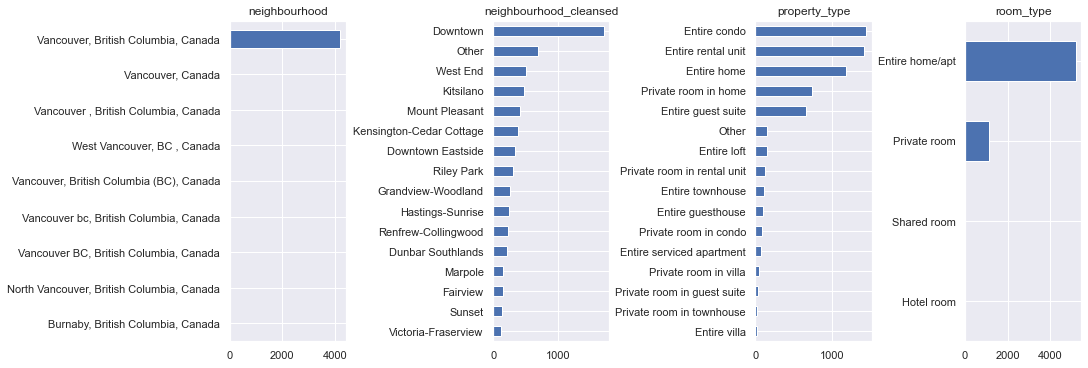

In [228]:
_, axes = plt.subplots(1, 4, figsize=(15, 5), layout="constrained")

for ax, col in zip(axes.flat, categoricas):
    listings[col].value_counts().pipe(
        # Se agregan en un grupo "Others" las categorías que no pertenecen a las 15 más frecuentes
        lambda x: x.groupby(
            np.where(x.index.isin(x.index[:15]), x.index, "Other")
        ).sum()
    ).sort_values().plot.barh(ax=ax)

    ax.set_title(col)
# sns.countplot(listings, y=col, ax=ax)

In [229]:
listings["property_type_ajustada"] = (
    listings["property_type"]
    .str.replace("(Private room in |Shared room in |Entire |Room in )", "", regex=True)
    .str.title()
    .pipe(
        lambda x: np.where(
            x.isin(x.value_counts()[x.value_counts() < 10].index), "Others", x
        )
    )
)

In [230]:
categoricas = [
    "neighbourhood_cleansed",
    "property_type_ajustada",
    "room_type",
    "shared_bathrooms",
]

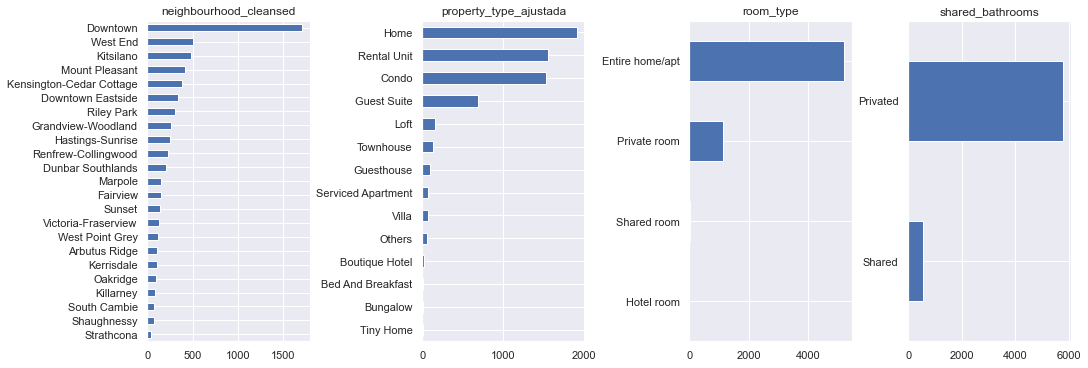

In [232]:
_, axes = plt.subplots(1, 4, figsize=(15, 5), layout="constrained")

for ax, col in zip(axes.flat, categoricas):
    listings[col].value_counts().sort_values().plot.barh(ax=ax)

    ax.set_title(col)

## Exploración univariada de variables cuantitativas

In [70]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6355.0,3.288925e+17,3.807700e+17,1.318800e+04,2.898755e+07,5.119770e+07,7.376943e+17,9.095784e+17
scrape_id,6355.0,2.023061e+13,0.000000e+00,2.023061e+13,2.023061e+13,2.023061e+13,2.023061e+13,2.023061e+13
host_id,6355.0,1.747044e+08,1.695789e+08,6.033000e+03,2.260310e+07,1.137402e+08,2.975667e+08,5.186788e+08
host_listings_count,6355.0,1.094068e+01,4.142422e+01,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,4.630000e+02
host_total_listings_count,6355.0,1.734304e+01,5.656896e+01,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,5.570000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6355.0,4.926314e+01,2.056435e-02,4.920296e+01,4.925103e+01,4.926944e+01,4.927908e+01,4.929436e+01
longitude,6355.0,-1.231126e+02,3.804396e-02,-1.232219e+02,-1.231310e+02,-1.231159e+02,-1.230906e+02,-1.230237e+02
accommodates,6355.0,3.559717e+00,2.066112e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,6354.0,1.354265e+00,7.028141e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+00,1.000000e+01


Con base en el diccionario de datos no se tienen en cuenta las siguientes variables por ser IDs, por referirse a información del anfitrión, que no es relevante por que no corresponde a características del inmueble o que tiene todos sus valores nulos:

- id
- scrape_id
- host_id
- host_listings_count
- host_total_listings_count
- neighbourhood_group_cleansed
- minimum_nights
- maximum_nights
- minimum_minimum_nights
- maximum_minimum_nights
- minimum_maximum_nights
- maximum_maximum_nights
- minimum_nights_avg_ntm
- maximum_nights_avg_ntm
- calendar_updated
- calculated_host_listings_count
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms
- review_scores_accuracy
- review_scores_checkin
- review_scores_communication
- review_scores_cleanliness
- host_response_rate_adjusted
- accommodates

Dado que el tiempo para el análisis es limitado se decide también omitir las siguientes variables, dado que pueden estar recogidas por otras variables del dataset que se refieren a periodos de tiempo más cercanos, que pueden reflejar mejor la realidad actual del inmueble: 
- availability_60
- availability_90
- availability_365
- number_of_reviews
- number_of_reviews_ltm
- reviews_per_month
- review_scores_rating (*porque review_scores_location y review_scores_value recogen la información más relevante de la calificación para este caso*)

  
Se decide explorar las siguientes variables:
- latitude
- longitude
- bathrooms
- bedrooms
- beds
- availability_30
- number_of_reviews_l30d
- review_scores_location
- review_scores_value
- price_ajustada

Así mismo, desde el punto de vista del negocio, se considera que las siguientes variables pueden ser las principales:

- **price_ajustada**: Porque el retorno de una inversión en estos bienes depende en parte del precio al que se pueda arrendar y de la frecuencia de arriendo.
- **availability_30**: porque es una proxy de qué tanto se arrendará un inmueble (es aproximada porque de acuerdo al diccionario un inmueble también puede no estar disponible sin estar ocupado).
-  **number_of_reviews**: porque es otra forma de aproximarnos a qué tanto se ha ocupado el inmueble.

In [71]:
cuantitativas = [
    "latitude",
    "longitude",
    "bathrooms",
    "bedrooms",
    "beds",
    "availability_30",
    "number_of_reviews_l30d",
    "review_scores_location",
    "review_scores_value",
    "price_ajustada",
]

In [98]:
listings[cuantitativas].describe().T.style.format("{:,.2f}")

,count,mean,std,min,25%,50%,75%,max
latitude,"6,355.00",49.26,0.02,49.20,49.25,49.27,49.28,49.29
longitude,"6,355.00",-123.11,0.04,-123.22,-123.13,-123.12,-123.09,-123.02
bathrooms,"6,354.00",1.35,0.70,0.00,1.00,1.00,1.50,10.00
bedrooms,"5,037.00",1.78,1.03,1.00,1.00,2.00,2.00,13.00
beds,"6,313.00",1.94,1.19,1.00,1.00,2.00,2.00,13.00
availability_30,"6,355.00",6.50,8.49,0.00,0.00,3.00,9.00,30.00
number_of_reviews_l30d,"6,355.00",1.40,2.17,0.00,0.00,0.00,2.00,16.00
review_scores_location,"5,233.00",4.83,0.27,1.00,4.78,4.91,5.00,5.00
review_scores_value,"5,234.00",4.68,0.39,1.00,4.60,4.76,4.89,5.00
price_ajustada,"6,355.00",250.52,571.81,14.00,120.00,179.00,275.00,"28,386.00"


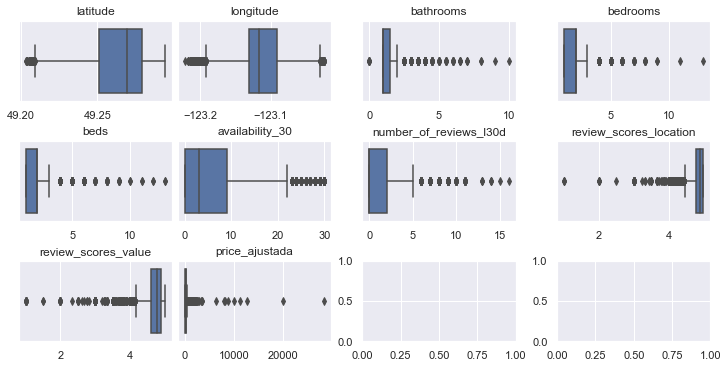

In [86]:
_, axes = plt.subplots(3, 4, figsize=(10, 5), layout="constrained")

for col, ax in zip(cuantitativas, axes.flat):
    sns.boxplot(listings, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

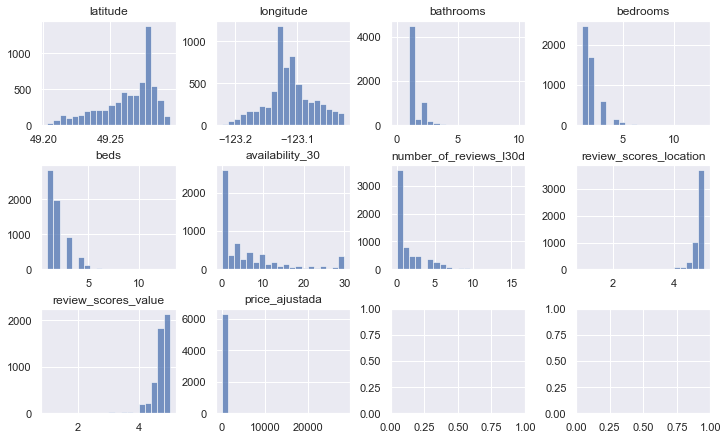

In [92]:
_, axes = plt.subplots(3, 4, figsize=(10, 6), layout="constrained")

for col, ax in zip(cuantitativas, axes.flat):
    sns.histplot(listings, x=col, ax=ax, bins=20)
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

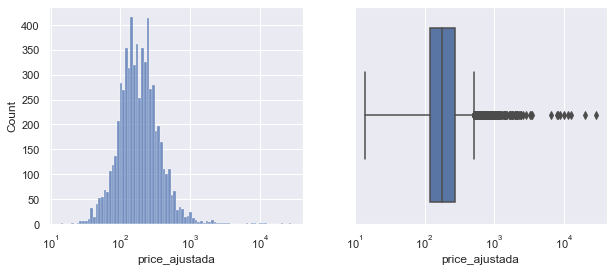

In [100]:
# listings["price_ajustada"].apply(np.log).hist()

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(listings, x="price_ajustada", log_scale=True, ax=ax1)
g = sns.boxplot(listings, x="price_ajustada", ax=ax2)
ax2.set_xscale("log")

# 3) Estrategia de análisis

Dado que se busca dar recomendaciones de inversión, en el análisis se intenta identificar aquellas variables que más afectan el precio de arriendo de los inmuebles y la ocupación. Para ello se realiza un análisis bivariado principalmente gráfico en el cual se busca relacionar las variables cualitativas y cuantitativas 

# Análisis bivariado 

### Relaciones entre las variables categóricas y el precio

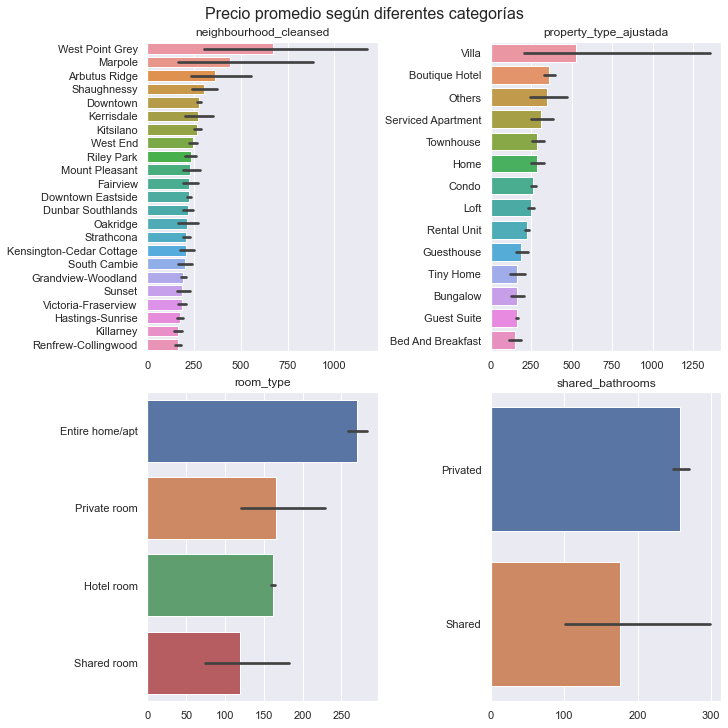

In [234]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), layout="constrained")
fig.suptitle("Precio promedio según diferentes categorías", fontsize=16)

for ax, col in zip(axes.flat, categoricas):
    g = sns.barplot(
        listings,
        y=col,
        x="price_ajustada",
        # kind="bar",
        order=listings.groupby(col)["price_ajustada"]
        .mean()
        .sort_values(ascending=False)
        .index,
        ax=ax,
    )
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    # g.ax.set_xscale("log")

In [186]:
listings["log price"] = np.log(listings["price_ajustada"])

cuantitativas = [
    "log price",
    "price_ajustada",
    "availability_30",
    "number_of_reviews_l30d",
    "review_scores_location",
    "review_scores_value",
    "latitude",
    "longitude",
    "bathrooms",
    "bedrooms",
    "beds",
]

<AxesSubplot: >

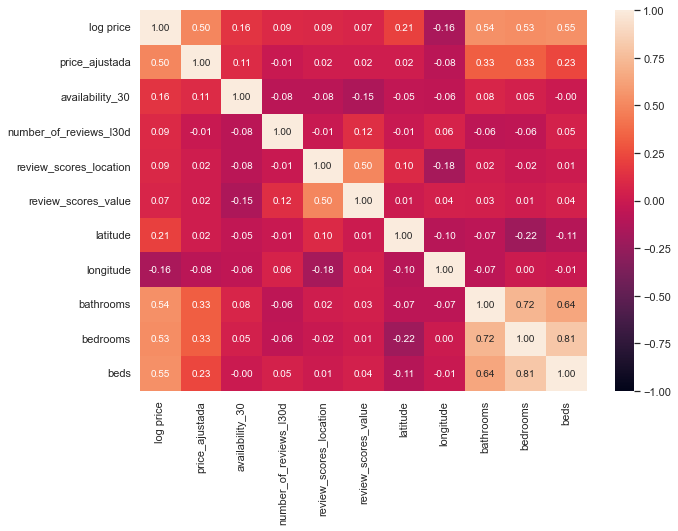

In [192]:
plt.figure(figsize=(10, 7))
sns.heatmap(listings[cuantitativas].corr(), annot=True, fmt="0.2f", vmax=1, vmin=-1)

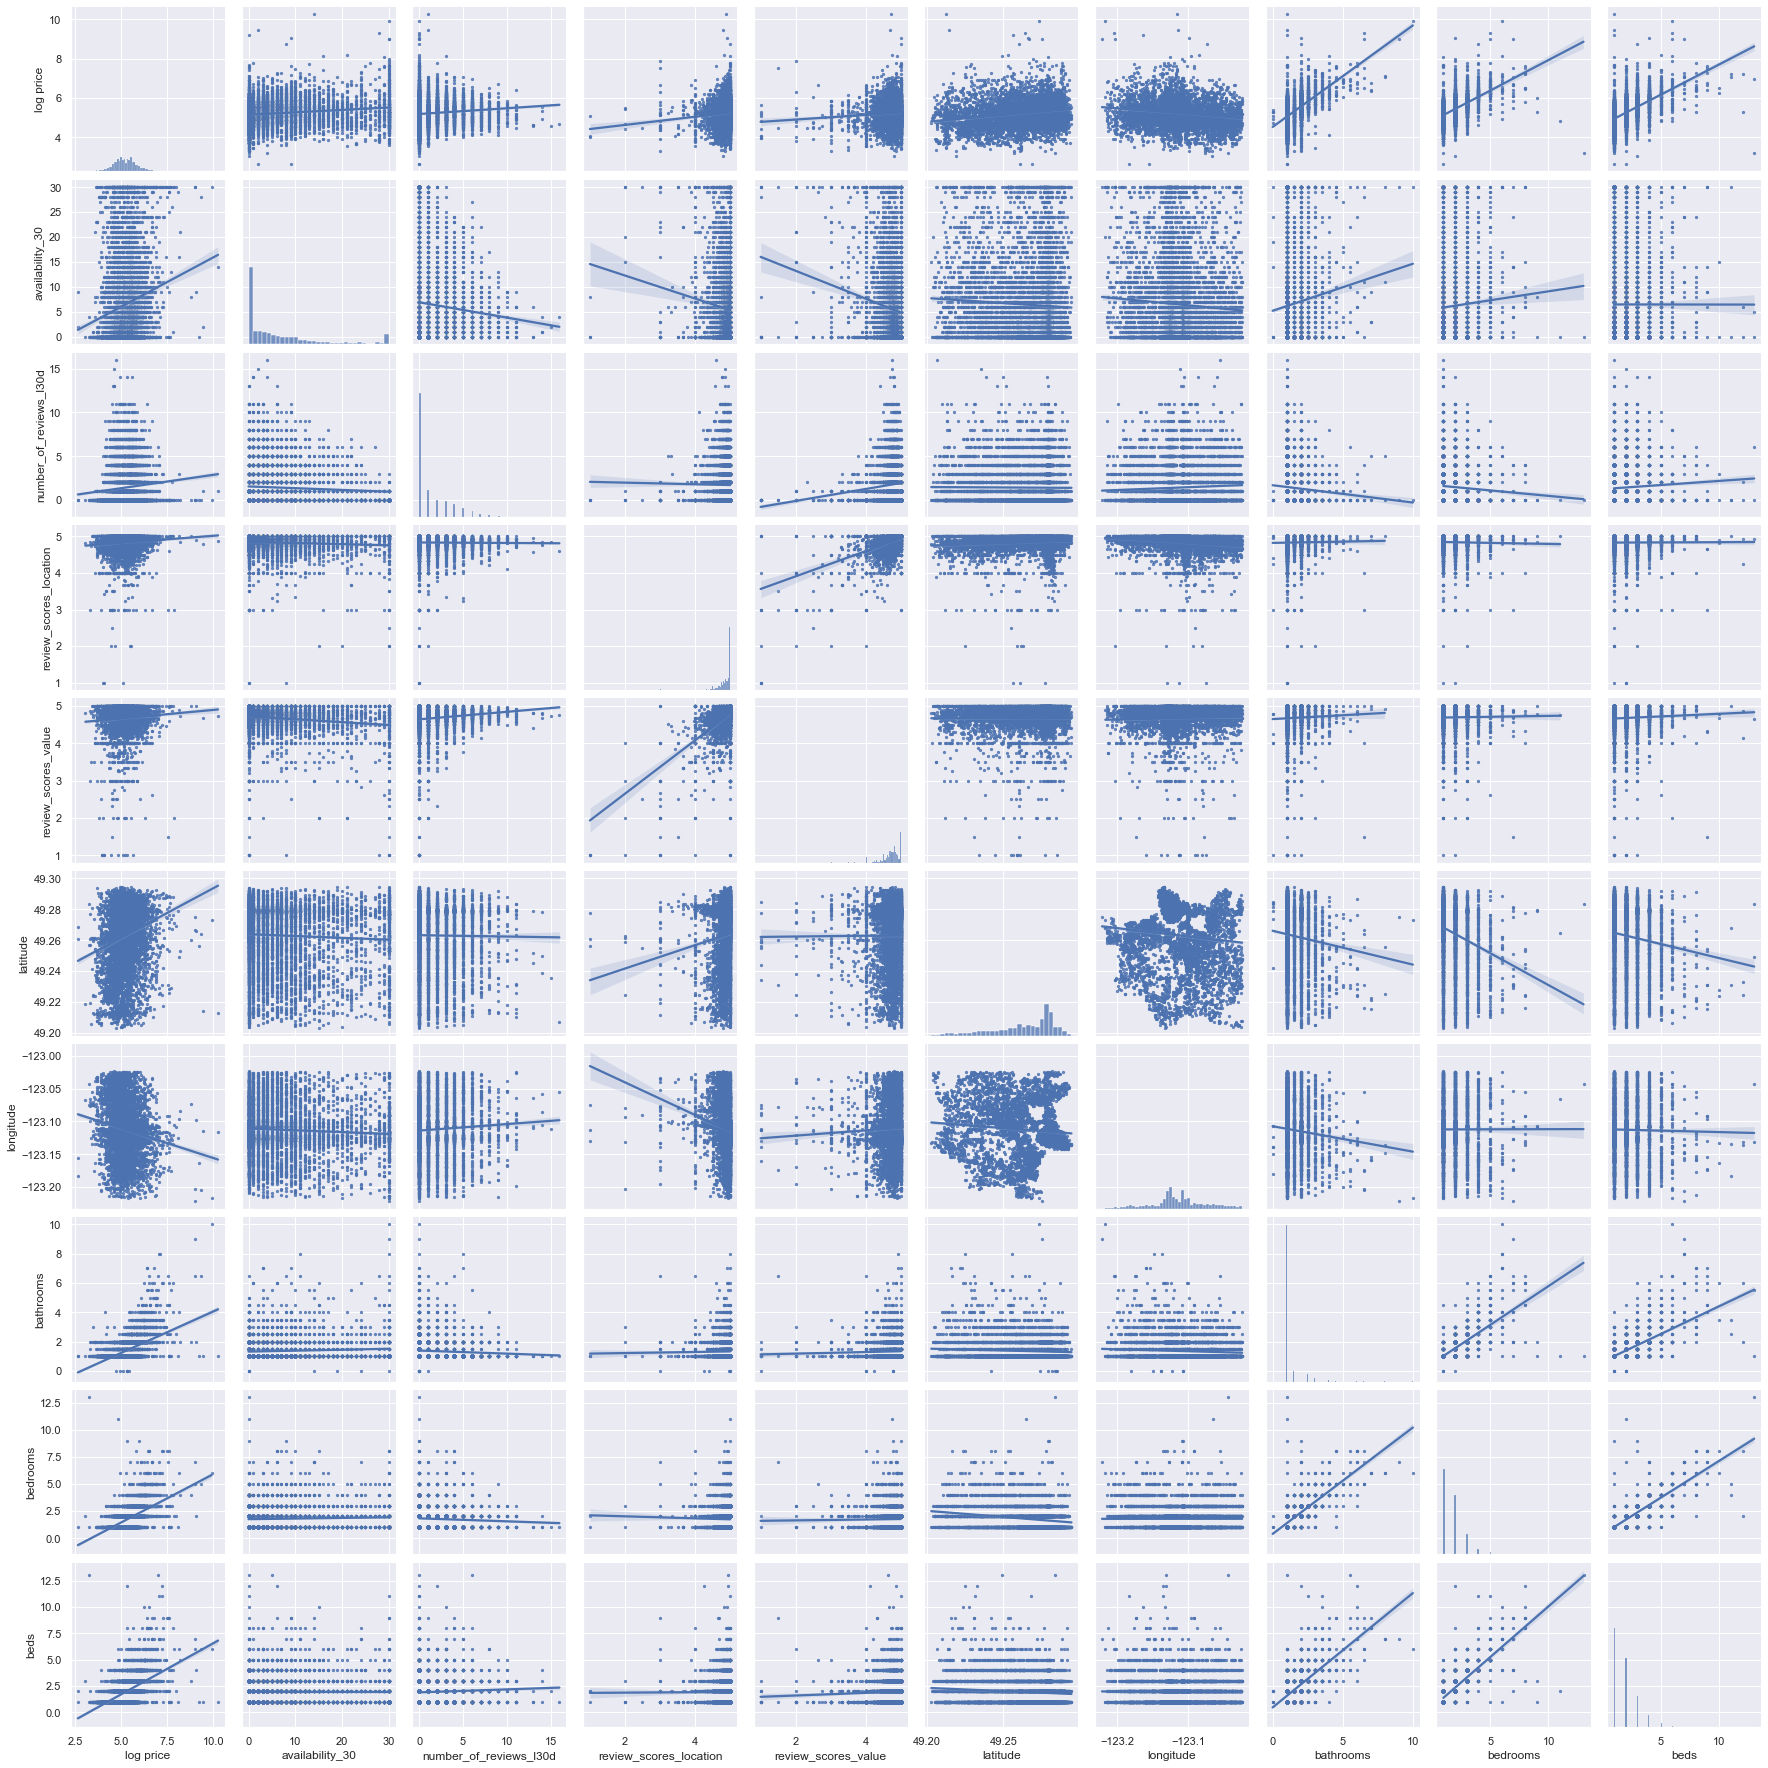

In [218]:
sns.pairplot(
    listings,
    vars=[
        "log price",
        "availability_30",
        "number_of_reviews_l30d",
        "review_scores_location",
        "review_scores_value",
        "latitude",
        "longitude",
        "bathrooms",
        "bedrooms",
        "beds",
    ],
    kind="reg",
    plot_kws={"scatter_kws": {"s": 5}},
)

## Variables geográficas

In [255]:
listings["Price Quartile"] = pd.cut(
    listings["price_ajustada"],
    bins=listings["price_ajustada"].quantile([0, 0.25, 0.5, 0.75, 1]),
    labels=["Q1", "Q2", "Q3", "Q4"],
)

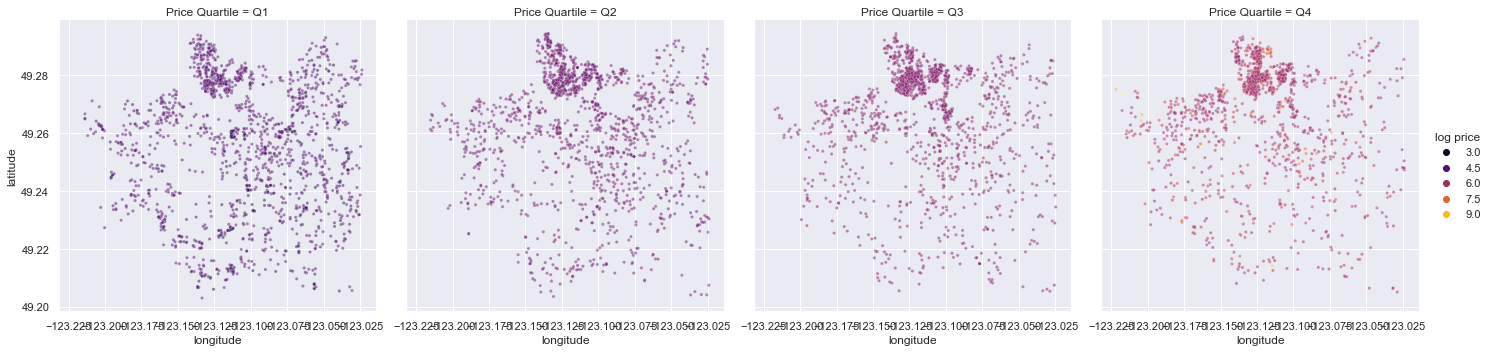

In [258]:
sns.relplot(
    listings,
    y="latitude",
    x="longitude",
    alpha=0.5,
    s=10,
    col="Price Quartile",
    hue="log price",
    palette="inferno",
)